In [3]:
import company as cmp

In [2]:
#Sample Problem 1
#expected pv = 8.7

#initializers
re = 0.12
gt = 0.01
shares = 1
year = 5 #number of years to forescast; i.e. not including ttm (baseline) year

#company input data
financials ={
'date' : '2021-12-31',
'e': 1,    
}

#method specific inputs
payout = 0.5
gf = [0.05,0.04]
roe = 0.15

xyz = cmp.company(financials = financials, ticker = 'xyz',re = re, gt = gt, year = year, shares = shares)
xyz.fcf_from_earnings(payout,gf,roe)
xyz.value() 

2021-11-05 13:58:05,669 INFO:xyz
2021-11-05 13:58:05,685 INFO:datacheck complete: financial dataset appears complete for fcf_from_earnings
2021-11-05 13:58:05,686 INFO:input data used for the forecast is:
2021-11-05 13:58:05,687 INFO:{'date': [datetime.datetime(2021, 12, 31, 0, 0), datetime.datetime(2022, 12, 31, 0, 0), datetime.datetime(2023, 12, 31, 0, 0), datetime.datetime(2024, 12, 30, 0, 0), datetime.datetime(2025, 12, 30, 0, 0), datetime.datetime(2026, 12, 30, 0, 0)], 'e': 1}
C:\Users\z003eb4h\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
2021-11-05 13:58:05,883 INFO:fcf_from_earnings() method complete
2021-11-05 13:58:05,886 INFO:value() method complete


(date
 2021-12-31     8.708702
 2022-12-31     9.137746
 2023-12-31     9.498995
 2024-12-30     9.781982
 2025-12-30     9.977347
 2026-12-30    10.077120
 Name: equity, dtype: float64, date
 2021-12-31    None
 2022-12-31    None
 2023-12-31    None
 2024-12-30    None
 2025-12-30    None
 2026-12-30    None
 Name: firm, dtype: object)

In [3]:
#Sample Problem 2
#Value=2929.108 - note: the calculation doesn't use the first value of fcfe, since this is supposed to be a ttm number.

#initilizers
re = 0.0557+0.0214
gt = 0.0214
year = 6 #number of years to forescast; i.e. not including ttm (baseline) year

#bypass financials
financials ={'date' : '2021-12-31'}
fcfe=[0, 155.76,161.20,166.84,172.67,178.71,182.53]
abc = cmp.company(financials = financials, ticker = 'abc', year = year, fcfe = fcfe, re = re, gt = gt)
print(abc.value())


2021-11-05 13:58:14,258 INFO:abc
2021-11-05 13:58:14,263 INFO:input data used for the forecast is:
2021-11-05 13:58:14,263 INFO:{'date': [datetime.datetime(2021, 12, 31, 0, 0), datetime.datetime(2022, 12, 31, 0, 0), datetime.datetime(2023, 12, 31, 0, 0), datetime.datetime(2024, 12, 30, 0, 0), datetime.datetime(2025, 12, 30, 0, 0), datetime.datetime(2026, 12, 30, 0, 0), datetime.datetime(2027, 12, 30, 0, 0)]}
2021-11-05 13:58:14,268 INFO:value() method complete


(date
2021-12-31    2929.108531
2022-12-31    2999.182798
2023-12-31    3069.219792
2024-12-30    3139.016638
2025-12-30    3208.364821
2026-12-30    3277.019749
2027-12-30    3347.147971
Name: equity, dtype: float64, date
2021-12-31    None
2022-12-31    None
2023-12-31    None
2024-12-30    None
2025-12-30    None
2026-12-30    None
2027-12-30    None
Name: firm, dtype: object)


In [5]:
#Sample Problem 3
#full ebitda based calculation

#initializers
rd = 0.065
re = 0.10
t = 0.21
shares = 2.3 
gt = 0.02
roict=0.75 #this could be quite high if there is significant uncapitalized R&D
year = 10 #number of years to forescast; i.e. not including ttm (baseline) year

#company input data
financials = {
'date' : '2021-12-31',
'ebitda' : [13.7,13.8,14.0,14.7,16.0,18.1,19.6,21.4,23.7,26.4,29.7],
'capex' :  [1.4,1.5,1.6,1.6,1.8,2.0,2.0,2.1,2.2,2.4,2.5],
'dwc' : [0,0,0,0,0,0,0,0,0,0,0],
'tax' : [0.68],
'da' : [6.8,7.0,7.3,8.0,9.0], #don't input for all years since the terminal year should be calculated from capex and ROIC
'debt' :  [51.7,43.3,34.6,36.6,40.0,45.2,48.9,53.6,59.3,74.3,80], #the terminal year should not increase from the prior year

'interest' : [3.6],
'cash' : 0,
'nol' : 0,
'noa' : 0,
}

# date = date of the last reporting quarter
# ebitda = earnings before, interest, tax, depreciation or amortization
# capex = capital expenditure, list
# dwc = changes in non-cash workking capital, list
# tax0 = ttm reported taxes, float 
# da0 = ttm depreciation and amortization, float
# debt = short and long term debt, list
# cash = excess cash, short term investments on balancesheet not used for working capital, float
# nol = net operating loss, i.e. tax losses subtracted from ebit for the purpose of calculating taxes, float
# noa = other non-operating assets, examples: land, properties, other even business's not included in the cashflows, float 

DISCK = cmp.company(financials = financials,ticker = 'DISCK',rd = rd,re = re,t = t,shares = shares,gt = gt,roict = roict,year = year)
DISCK.fcf_from_ebitda()
DISCK.fcf_to_debt(leverage=2.5)
DISCK.fcf_to_buyback(price=28.22,dp = 'proportional')
DISCK.value()
DISCK.display_fin()


2021-11-05 13:58:55,809 INFO:DISCK
2021-11-05 13:58:55,820 INFO:datacheck complete: financial dataset appears complete for fcf_from_ebitda
2021-11-05 13:58:55,821 INFO:input data used for the forecast is:
2021-11-05 13:58:55,821 INFO:{'date': [datetime.datetime(2021, 12, 31, 0, 0), datetime.datetime(2022, 12, 31, 0, 0), datetime.datetime(2023, 12, 31, 0, 0), datetime.datetime(2024, 12, 30, 0, 0), datetime.datetime(2025, 12, 30, 0, 0), datetime.datetime(2026, 12, 30, 0, 0), datetime.datetime(2027, 12, 30, 0, 0), datetime.datetime(2028, 12, 29, 0, 0), datetime.datetime(2029, 12, 29, 0, 0), datetime.datetime(2030, 12, 29, 0, 0), datetime.datetime(2031, 12, 29, 0, 0)], 'ebitda': [13.7, 13.8, 14.0, 14.7, 16.0, 18.1, 19.6, 21.4, 23.7, 26.4, 29.7], 'capex': [1.4, 1.5, 1.6, 1.6, 1.8, 2.0, 2.0, 2.1, 2.2, 2.4, 2.5], 'dwc': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'tax': [0.68], 'da': [6.8, 7.0, 7.3, 8.0, 9.0], 'debt': [51.7, 43.3, 34.6, 36.6, 40.0, 45.2, 48.9, 53.6, 59.3, 74.3, 80], 'interest': [3.6],

date,2021-12-31 00:00:00,2022-12-31 00:00:00,2023-12-31 00:00:00,2024-12-30 00:00:00,2025-12-30 00:00:00,2026-12-30 00:00:00,2027-12-30 00:00:00,2028-12-29 00:00:00,2029-12-29 00:00:00,2030-12-29 00:00:00,2031-12-29 00:00:00
ebitda,13.7,13.8,14.0,14.7,16.0,18.1,19.6,21.4,23.7,26.4,29.7
da,6.8,7.0,7.3,8.0,9.0,7.8,6.6,5.5,4.3,3.1,1.9
interest,3.6,3.4,2.8,2.3,2.4,2.6,2.9,3.2,3.5,3.9,4.3
income_pretax,3.3,3.4,3.9,4.4,4.6,7.7,10.0,12.8,15.9,19.5,23.5
nol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
income_taxable,3.3,3.4,3.9,4.4,4.6,7.7,10.0,12.8,15.9,19.5,23.5
tax_cash,0.7,0.7,0.8,0.9,1.0,1.6,2.1,2.7,3.3,4.1,4.9
tax,0.7,0.7,0.8,0.9,1.0,1.6,2.1,2.7,3.3,4.1,4.9
capex,1.4,1.5,1.6,1.6,1.8,2.0,2.0,2.1,2.2,2.4,2.5
dDebt,0.0,-8.2,-8.5,1.8,3.2,5.2,3.8,4.5,5.8,6.8,8.2


In [6]:
#Sample Problem ATKR
#PV = 172.72

#initializers
ticker = 'atkr'
re = 0.0656
gt = 0.02
shares = 1
year = 10 #number of years to forescast; i.e. not including ttm (baseline) year

#company input data
financials ={
'date' : '2021-10-31',
'e': [5.65,6.5]
}

#method specific inputs
payout = 0.2
gf = [0.15]
roe = 0.12

atkr = cmp.company(financials = financials, ticker = ticker,re = re, gt = gt, year = year, shares = shares)
atkr.fcf_from_earnings(payout,gf,roe)
atkr.value() 

2021-11-05 13:59:44,969 INFO:atkr
2021-11-05 13:59:44,974 INFO:datacheck complete: financial dataset appears complete for fcf_from_earnings
2021-11-05 13:59:44,975 INFO:input data used for the forecast is:
2021-11-05 13:59:44,976 INFO:{'date': [datetime.datetime(2021, 10, 31, 0, 0), datetime.datetime(2022, 10, 31, 0, 0), datetime.datetime(2023, 10, 31, 0, 0), datetime.datetime(2024, 10, 30, 0, 0), datetime.datetime(2025, 10, 30, 0, 0), datetime.datetime(2026, 10, 30, 0, 0), datetime.datetime(2027, 10, 30, 0, 0), datetime.datetime(2028, 10, 29, 0, 0), datetime.datetime(2029, 10, 29, 0, 0), datetime.datetime(2030, 10, 29, 0, 0), datetime.datetime(2031, 10, 29, 0, 0)], 'e': [5.65, 6.5]}
2021-11-05 13:59:45,374 INFO:fcf_from_earnings() method complete
2021-11-05 13:59:45,376 INFO:value() method complete


(date
 2021-10-31    172.723356
 2022-10-31    182.343000
 2023-10-31    191.891400
 2024-10-30    201.241022
 2025-10-30    210.260233
 2026-10-30    218.819712
 2027-10-30    226.799769
 2028-10-29    234.098169
 2029-10-29    240.637933
 2030-10-29    246.374561
 2031-10-29    251.302053
 Name: equity, dtype: float64, date
 2021-10-31    None
 2022-10-31    None
 2023-10-31    None
 2024-10-30    None
 2025-10-30    None
 2026-10-30    None
 2027-10-30    None
 2028-10-29    None
 2029-10-29    None
 2030-10-29    None
 2031-10-29    None
 Name: firm, dtype: object)

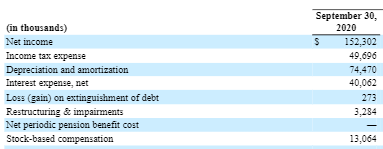

In [7]:
#ATKR
#full ebitda based calculation, using forecast_ebitda() and load_data() method

#initializers
rd = 0.045
re = 0.10
t = 0.21
shares = 47.548 
gt = 0.02
roict=0.15 #this could be quite high if there is significant uncapitalized R&D
year = 10 #number of years to forescast; i.e. not including ttm (baseline) year

#company input data
financials = {
'date' : '2021-9-30',
'ebitda' : [370], #only the ttm year, other years are calculated using the forecast_ebitda() method
'capex' :  [55,55,63,71,80,88,95,102,107,111,113],
'dwc' : [0,0,0,0,0,0,0,0,0,0,0],
'tax' : [65.5],
'da' : [75], #don't input for all years since the terminal year should be calculated from capex and ROIC
'debt' :  [226,765,765,765,765,765,765,765,765,765,765], 

'interest' : [33],
'cash' : 0, #currently 765 debt, 304 cash, forecast to generate another ~235 by 2021
'nol' : 0,
'noa' : 0,
}

# date = date of the last reporting quarter
# ebitda = earnings before, interest, tax, depreciation or amortization
# capex = capital expenditure, list
# dwc = changes in non-cash workking capital, list
# tax0 = ttm reported taxes, float 
# da0 = ttm depreciation and amortization, float
# debt = short and long term debt, list
# cash = excess cash, short term investments on balancesheet not used for working capital, float
# nol = net operating loss, i.e. tax losses subtracted from ebit for the purpose of calculating taxes, float
# noa = other non-operating assets, examples: land, properties, other even business's not included in the cashflows, float 

ATKR = cmp.company(ticker = 'ATKR',rd = rd,re = re,t = t,shares = shares,gt = gt,roict = roict,year = year)
ATKR.forecast_ebitda(370,[0.15,0.15], financials)
ATKR.load_financials(financials = financials.copy())
ATKR.fcf_from_ebitda()
ATKR.fcf_to_debt(leverage=1.9)
ATKR.fcf_to_buyback(price=85,dp = 'proportional')
ATKR.value()
ATKR.display_fin()


2021-11-05 14:00:27,400 INFO:ATKR
2021-11-05 14:00:27,409 INFO:datacheck complete: financial dataset appears complete for fcf_from_ebitda
2021-11-05 14:00:27,410 INFO:input data used for the forecast is:
2021-11-05 14:00:27,411 INFO:{'date': [datetime.datetime(2021, 9, 30, 0, 0), datetime.datetime(2022, 9, 30, 0, 0), datetime.datetime(2023, 9, 30, 0, 0), datetime.datetime(2024, 9, 29, 0, 0), datetime.datetime(2025, 9, 29, 0, 0), datetime.datetime(2026, 9, 29, 0, 0), datetime.datetime(2027, 9, 29, 0, 0), datetime.datetime(2028, 9, 28, 0, 0), datetime.datetime(2029, 9, 28, 0, 0), datetime.datetime(2030, 9, 28, 0, 0), datetime.datetime(2031, 9, 28, 0, 0)], 'ebitda': [370, 425.49999999999994, 489.3249999999999, 555.655722222222, 622.9518041358023, 689.3999965769545, 752.9779962612737, 811.5429515260394, 862.9406717893551, 905.1288824101681, 936.3055439154073], 'capex': [55, 55, 63, 71, 80, 88, 95, 102, 107, 111, 113], 'dwc': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'tax': [65.5], 'da': [75], 'de

date,2021-09-30 00:00:00,2022-09-30 00:00:00,2023-09-30 00:00:00,2024-09-29 00:00:00,2025-09-29 00:00:00,2026-09-29 00:00:00,2027-09-29 00:00:00,2028-09-28 00:00:00,2029-09-28 00:00:00,2030-09-28 00:00:00,2031-09-28 00:00:00
ebitda,370.0,425.5,489.3,555.7,623.0,689.4,753.0,811.5,862.9,905.1,936.3
da,75.0,69.1,63.2,57.3,51.4,45.5,39.6,33.7,27.9,22.0,16.1
interest,33.0,10.2,36.4,41.8,47.5,53.3,58.9,64.4,69.4,73.8,77.4
income_pretax,262.0,346.2,389.7,456.5,524.0,590.6,654.4,713.4,765.7,809.4,842.8
nol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
income_taxable,262.0,346.2,389.7,456.5,524.0,590.6,654.4,713.4,765.7,809.4,842.8
tax_cash,65.5,83.2,92.3,106.3,120.5,134.5,147.9,160.3,171.3,180.5,187.5
tax,65.5,83.2,92.3,106.3,120.5,134.5,147.9,160.3,171.3,180.5,187.5
capex,55.0,55.0,63.0,71.0,80.0,88.0,95.0,102.0,107.0,111.0,113.0
dDebt,0.0,582.4,121.3,126.0,127.9,126.3,120.8,111.3,97.7,80.2,59.2


In [8]:
#FRG
#full ebitda based calculation, using forecast_ebitda() and load_data() method

#initializers
rd = 0.065
re = 0.10
t = 0.21
shares = 34.971 
gt = 0.02
roict=0.15 #this could be quite high if there is significant uncapitalized R&D
year = 3 #number of years to forescast; i.e. not including ttm (baseline) year

#company input data
financials = {
'date' : '2020-12-26',
'ebitda' : [303], #only the ttm year, other years are calculated using the forecast_ebitda() method
'capex' :  [52,40,42,44],
'dwc' : [0,0,0,0],
'tax' : [0],
'da' : [51.847,54.4], #don't input for all years since the terminal year should be calculated from capex and ROIC
'debt' :  [908.3,908.3,908.3,908.3], 

'interest' : [96.7],
'cash' : 0, #Currently 765 debt, 304 cash, forecast to generate another ~235 by 2021
'nol' : 127.4,
'noa' : 67, #None if nothing, this is for the $67 of equity
}

# date = date of the last reporting quarter
# ebitda = earnings before, interest, tax, depreciation or amortization
# capex = capital expenditure, list
# dwc = changes in non-cash workking capital, list
# tax0 = ttm reported taxes, float 
# da0 = ttm depreciation and amortization, float
# debt = short and long term debt, list
# cash = excess cash, short term investments on balancesheet not used for working capital, float
# nol = net operating loss, i.e. tax losses subtracted from ebit for the purpose of calculating taxes, float
# noa = other non-operating assets, examples: land, properties, other even business's not included in the cashflows, float 

FRG = cmp.company(ticker = 'FRG',rd = rd,re = re,t = t,shares = shares,gt = gt,roict = roict,year = year)
FRG.forecast_ebitda(303,[0.089,0.05], financials)
FRG.load_financials(financials = financials.copy())
FRG.fcf_from_ebitda()
FRG.fcf_to_debt(leverage=2.5)
FRG.fcf_to_buyback(price=35,dp = 'proportional')
FRG.value()
FRG.display_fin()


2021-11-05 14:00:46,304 INFO:FRG
2021-11-05 14:00:46,314 INFO:datacheck complete: financial dataset appears complete for fcf_from_ebitda
2021-11-05 14:00:46,316 INFO:input data used for the forecast is:
2021-11-05 14:00:46,317 INFO:{'date': [datetime.datetime(2020, 12, 26, 0, 0), datetime.datetime(2021, 12, 26, 0, 0), datetime.datetime(2022, 12, 26, 0, 0), datetime.datetime(2023, 12, 26, 0, 0)], 'ebitda': [303, 329.967, 346.46535, 358.59163724999996], 'capex': [52, 40, 42, 44], 'dwc': [0, 0, 0, 0], 'tax': [0], 'da': [51.847, 54.4], 'debt': [908.3, 908.3, 908.3, 908.3], 'interest': [96.7], 'cash': 0, 'nol': 127.4, 'noa': 67}
2021-11-05 14:00:46,318 INFO:load_financials() method complete
2021-11-05 14:00:47,038 INFO:fcf_from_ebitda() method complete
2021-11-05 14:00:47,899 INFO:fcf_from_ebitda() method complete
2021-11-05 14:00:48,731 INFO:fcf_from_ebitda() method complete
2021-11-05 14:00:49,556 INFO:fcf_from_ebitda() method complete
2021-11-05 14:00:49,557 INFO:fcf_to_debt() method com

date,2020-12-26 00:00:00,2021-12-26 00:00:00,2022-12-26 00:00:00,2023-12-26 00:00:00
ebitda,303.0,330.0,346.5,358.6
da,51.8,54.4,30.7,7.0
interest,96.7,59.0,53.6,56.3
income_pretax,154.5,216.5,262.2,295.3
nol,127.4,0.0,0.0,0.0
income_taxable,0.0,89.1,262.2,295.3
tax_cash,0.0,18.7,55.1,62.0
tax,0.0,13.0,22.6,29.6
capex,52.0,40.0,42.0,44.0
dDebt,0.0,-83.4,41.2,30.3


In [9]:
#ATKR post fy21 Q3
#full ebitda based calculation, using forecast_ebitda() and load_data() method

#initializers
rd = 0.045
re = 0.10
t = 0.21
shares = 46.102+0.684 
gt = 0.02
roict=0.15 #this could be quite high if there is significant uncapitalized R&D
year = 10 #number of years to forescast; i.e. not including ttm (baseline) year

#company input data
financials = {
'date' : '2021-9-30',
'ebitda' : [865], #only the ttm year, other years are calculated using the forecast_ebitda() method
'capex' :  [55,55,63,71,80,88,95,102,107,111,121],
'dwc' : [0,0,0,0,0,0,0,0,0,0,0],
'tax' : [189],
'da' : [75], #don't input for all years since the terminal year should be calculated from capex and ROIC
'debt' :  [780,765,765,765,765,765,765,765,765,765,765], 

'interest' : [33],
'cash' : 397+100,
'nol' : 0,
'noa' : 0,
}

# date = date of the last reporting quarter
# ebitda = earnings before, interest, tax, depreciation or amortization
# capex = capital expenditure, list
# dwc = changes in non-cash workking capital, list
# tax0 = ttm reported taxes, float 
# da0 = ttm depreciation and amortization, float
# debt = short and long term debt, list
# cash = excess cash, short term investments on balancesheet not used for working capital, float
# nol = net operating loss, i.e. tax losses subtracted from ebit for the purpose of calculating taxes, float
# noa = other non-operating assets, examples: land, properties, other even business's not included in the cashflows, float 

ATKR = cmp.company(ticker = 'ATKR',rd = rd,re = re,t = t,shares = shares,gt = gt,roict = roict,year = year)
ATKR.forecast_ebitda(865,[-0.19,-0.28,0.15,0.15], financials)
ATKR.load_financials(financials = financials.copy())
ATKR.fcf_from_ebitda()
ATKR.fcf_to_debt(leverage=1.9)
#ATKR.fcf_to_buyback(price=100,dp = 'constant')
ATKR.fcf_to_buyback(price=85,dp = 'proportional')
ATKR.value()
ATKR.display_fin()


2021-11-05 14:01:29,343 INFO:ATKR
2021-11-05 14:01:29,353 INFO:datacheck complete: financial dataset appears complete for fcf_from_ebitda
2021-11-05 14:01:29,354 INFO:input data used for the forecast is:
2021-11-05 14:01:29,355 INFO:{'date': [datetime.datetime(2021, 9, 30, 0, 0), datetime.datetime(2022, 9, 30, 0, 0), datetime.datetime(2023, 9, 30, 0, 0), datetime.datetime(2024, 9, 29, 0, 0), datetime.datetime(2025, 9, 29, 0, 0), datetime.datetime(2026, 9, 29, 0, 0), datetime.datetime(2027, 9, 29, 0, 0), datetime.datetime(2028, 9, 28, 0, 0), datetime.datetime(2029, 9, 28, 0, 0), datetime.datetime(2030, 9, 28, 0, 0), datetime.datetime(2031, 9, 28, 0, 0)], 'ebitda': [865, 700.6500000000001, 504.4680000000001, 580.1382000000001, 667.15893, 754.8426750857144, 840.0320627025307, 919.2350857573407, 988.8343136789679, 1045.3391316034804, 1085.659355251043], 'capex': [55, 55, 63, 71, 80, 88, 95, 102, 107, 111, 121], 'dwc': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'tax': [189], 'da': [75], 'debt': [78

date,2021-09-30 00:00:00,2022-09-30 00:00:00,2023-09-30 00:00:00,2024-09-29 00:00:00,2025-09-29 00:00:00,2026-09-29 00:00:00,2027-09-29 00:00:00,2028-09-28 00:00:00,2029-09-28 00:00:00,2030-09-28 00:00:00,2031-09-28 00:00:00
ebitda,865.0,700.7,504.5,580.1,667.2,754.8,840.0,919.2,988.8,1045.3,1085.7
da,75.0,68.2,61.5,54.7,48.0,41.2,34.5,27.7,20.9,14.2,7.4
interest,33.0,35.1,59.9,43.1,49.6,57.0,64.5,71.8,78.6,84.5,89.4
income_pretax,757.0,597.3,383.1,482.3,569.6,656.6,741.0,819.7,889.3,946.6,988.9
nol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
income_taxable,757.0,597.3,383.1,482.3,569.6,656.6,741.0,819.7,889.3,946.6,988.9
tax_cash,189.0,155.5,110.5,131.3,149.6,167.9,185.6,202.2,216.8,228.8,237.7
tax,189.0,155.5,110.5,131.3,149.6,167.9,185.6,202.2,216.8,228.8,237.7
capex,55.0,55.0,63.0,71.0,80.0,88.0,95.0,102.0,107.0,111.0,121.0
dDebt,0.0,551.2,-372.7,143.8,165.3,166.6,161.9,150.5,132.2,107.4,76.6


In [10]:
#DISK post-Q3 2021
#full ebitda based calculation

#initializers
rd = 0.065
re = 0.1
t = 0.21
shares = 2.3 
gt = 0.02
roict=0.75 #this could be quite high if there is significant uncapitalized R&D
year = 10 #number of years to forescast; i.e. not including ttm (baseline) year

#company input data
financials = {
'date' : '2021-12-31',
'ebitda' : [13.7,13.8,14.0,14.7,16.0,18.1,19.6,21.4,23.7,26.4,29.7],
'capex' :  [1.4,1.5,1.6,1.6,1.8,2.0,2.0,2.1,2.2,2.4,2.5],
'dwc' : [0,0,0,0,0,0,0,0,0,0,0],
'tax' : [0.68],
'da' : [6.8,7.0,7.3,8.0,9.0], #don't input for all years since the terminal year should be calculated from capex and ROIC
'debt' :  [55,43.3,34.6,36.6,40.0,45.2,48.9,53.6,59.3,74.3,80], #the terminal year should not increase from the prior year

'interest' : [3.6],
'cash' : 0,
'nol' : 0,
'noa' : 0,
}

# date = date of the last reporting quarter
# ebitda = earnings before, interest, tax, depreciation or amortization
# capex = capital expenditure, list
# dwc = changes in non-cash workking capital, list
# tax0 = ttm reported taxes, float 
# da0 = ttm depreciation and amortization, float
# debt = short and long term debt, list
# cash = excess cash, short term investments on balancesheet not used for working capital, float
# nol = net operating loss, i.e. tax losses subtracted from ebit for the purpose of calculating taxes, float
# noa = other non-operating assets, examples: land, properties, other even business's not included in the cashflows, float 

DISCK = cmp.company(financials = financials,ticker = 'DISCK',rd = rd,re = re,t = t,shares = shares,gt = gt,roict = roict,year = year)
DISCK.fcf_from_ebitda()
DISCK.fcf_to_debt(leverage=2.5)
DISCK.fcf_to_buyback(price=28.22,dp = 'proportional')
DISCK.value()
DISCK.display_fin()


2021-11-05 14:01:58,292 INFO:DISCK
2021-11-05 14:01:58,303 INFO:datacheck complete: financial dataset appears complete for fcf_from_ebitda
2021-11-05 14:01:58,304 INFO:input data used for the forecast is:
2021-11-05 14:01:58,305 INFO:{'date': [datetime.datetime(2021, 12, 31, 0, 0), datetime.datetime(2022, 12, 31, 0, 0), datetime.datetime(2023, 12, 31, 0, 0), datetime.datetime(2024, 12, 30, 0, 0), datetime.datetime(2025, 12, 30, 0, 0), datetime.datetime(2026, 12, 30, 0, 0), datetime.datetime(2027, 12, 30, 0, 0), datetime.datetime(2028, 12, 29, 0, 0), datetime.datetime(2029, 12, 29, 0, 0), datetime.datetime(2030, 12, 29, 0, 0), datetime.datetime(2031, 12, 29, 0, 0)], 'ebitda': [13.7, 13.8, 14.0, 14.7, 16.0, 18.1, 19.6, 21.4, 23.7, 26.4, 29.7], 'capex': [1.4, 1.5, 1.6, 1.6, 1.8, 2.0, 2.0, 2.1, 2.2, 2.4, 2.5], 'dwc': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'tax': [0.68], 'da': [6.8, 7.0, 7.3, 8.0, 9.0], 'debt': [55, 43.3, 34.6, 36.6, 40.0, 45.2, 48.9, 53.6, 59.3, 74.3, 80], 'interest': [3.6], '

date,2021-12-31 00:00:00,2022-12-31 00:00:00,2023-12-31 00:00:00,2024-12-30 00:00:00,2025-12-30 00:00:00,2026-12-30 00:00:00,2027-12-30 00:00:00,2028-12-29 00:00:00,2029-12-29 00:00:00,2030-12-29 00:00:00,2031-12-29 00:00:00
ebitda,13.7,13.8,14.0,14.7,16.0,18.1,19.6,21.4,23.7,26.4,29.7
da,6.8,7.0,7.3,8.0,9.0,7.8,6.6,5.5,4.3,3.1,1.9
interest,3.6,3.6,3.1,2.5,2.4,2.6,2.9,3.2,3.5,3.9,4.3
income_pretax,3.3,3.2,3.6,4.2,4.6,7.7,10.0,12.8,15.9,19.5,23.5
nol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
income_taxable,3.3,3.2,3.6,4.2,4.6,7.7,10.0,12.8,15.9,19.5,23.5
tax_cash,0.7,0.7,0.8,0.9,1.0,1.6,2.1,2.7,3.3,4.1,4.9
tax,0.7,0.7,0.8,0.9,1.0,1.6,2.1,2.7,3.3,4.1,4.9
capex,1.4,1.5,1.6,1.6,1.8,2.0,2.0,2.1,2.2,2.4,2.5
dDebt,0.0,-8.1,-8.6,-1.6,3.2,5.2,3.8,4.5,5.8,6.8,8.2


In [5]:
#FRG
#full ebitda based calculation, using forecast_ebitda() and load_data() method
#

#initializers
rd = 0.065
re = 0.085
t = 0.21
shares = 0.744 + 40.295 
gt = 0.02
roict=0.15 #this could be quite high if there is significant uncapitalized R&D
year = 10 #number of years to forescast; i.e. not including ttm (baseline) year

#company input data
financials = {
'date' : '2021-12-26',
'ebitda' : [330], #only the ttm year, other years are calculated using the forecast_ebitda() method
'capex' :  [40,46.0,50.6,55.7,61.2,67.3,73.2,78.6,83.3,87.2,90.1], #year+1 required
'dwc' : [0,0,0,0,0,0,0,0,0,0,0], #year+1 required
'tax' : [0],
'da' : [51.847,54.4], #don't input for all years since the terminal year should be calculated from capex and ROIC
'debt' :  [1072.9,1072.9,1072.9,1072.9,1072.9,1072.9,1072.9,1072.9,1072.9,1072.9,1072.9], 

'interest' : [70],
'cash' : 159.72, 
'nol' : 127.4,
'noa' : 55.86, #0 if nothing, this is for the Nexpoint equity
}

# date = date of the last reporting quarter
# ebitda = earnings before, interest, tax, depreciation or amortization
# capex = capital expenditure, list
# dwc = changes in non-cash workking capital, list
# tax0 = ttm reported taxes, float 
# da0 = ttm depreciation and amortization, float
# debt = short and long term debt, list
# cash = excess cash, short term investments on balancesheet not used for working capital, float
# nol = net operating loss, i.e. tax losses subtracted from ebit for the purpose of calculating taxes, float
# noa = other non-operating assets, examples: land, properties, other even business's not included in the cashflows, float 

FRG = cmp.company(ticker = 'FRG',rd = rd,re = re,t = t,shares = shares,gt = gt,roict = roict,year = year)
FRG.forecast_ebitda(330,[0.15,0.1,0.1,0.1,0.1], financials)
FRG.load_financials(financials = financials.copy())
FRG.fcf_from_ebitda()
FRG.fcf_to_debt(leverage=2.5)
FRG.fcf_to_buyback(price=43,dp = 'proportional')
FRG.value()
FRG.display_fin()


2021-11-09 15:31:26,751 INFO:FRG
2021-11-09 15:31:26,761 INFO:datacheck complete: financial dataset appears complete for fcf_from_ebitda
2021-11-09 15:31:26,762 INFO:input data used for the forecast is:
2021-11-09 15:31:26,763 INFO:{'date': [datetime.datetime(2021, 12, 26, 0, 0), datetime.datetime(2022, 12, 26, 0, 0), datetime.datetime(2023, 12, 26, 0, 0), datetime.datetime(2024, 12, 25, 0, 0), datetime.datetime(2025, 12, 25, 0, 0), datetime.datetime(2026, 12, 25, 0, 0), datetime.datetime(2027, 12, 25, 0, 0), datetime.datetime(2028, 12, 24, 0, 0), datetime.datetime(2029, 12, 24, 0, 0), datetime.datetime(2030, 12, 24, 0, 0), datetime.datetime(2031, 12, 24, 0, 0)], 'ebitda': [330, 379.49999999999994, 417.45, 459.19500000000005, 505.1145000000001, 555.6259500000001, 603.7801990000002, 648.0574135933334, 686.9408584089334, 718.9980984680169, 742.9647017502842], 'capex': [40, 46.0, 50.6, 55.7, 61.2, 67.3, 73.2, 78.6, 83.3, 87.2, 90.1], 'dwc': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'tax': [0], '

date,2021-12-26 00:00:00,2022-12-26 00:00:00,2023-12-26 00:00:00,2024-12-25 00:00:00,2025-12-25 00:00:00,2026-12-25 00:00:00,2027-12-25 00:00:00,2028-12-24 00:00:00,2029-12-24 00:00:00,2030-12-24 00:00:00,2031-12-24 00:00:00
ebitda,330.0,379.5,417.4,459.2,505.1,555.6,603.8,648.1,686.9,719.0,743.0
da,51.8,54.4,49.8,45.3,40.7,36.1,31.5,27.0,22.4,17.8,13.2
interest,70.0,69.7,61.7,67.8,74.6,82.1,90.3,98.1,105.3,111.6,116.8
income_pretax,208.2,255.4,306.0,346.1,389.8,437.4,482.0,523.0,559.2,589.6,612.9
nol,127.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
income_taxable,0.0,128.0,306.0,346.1,389.8,437.4,482.0,523.0,559.2,589.6,612.9
tax_cash,0.0,26.9,64.3,72.7,81.9,91.9,101.2,109.8,117.4,123.8,128.7
tax,0.0,9.9,20.5,29.0,38.1,48.2,57.5,66.1,73.7,80.1,85.0
capex,40.0,46.0,50.6,55.7,61.2,67.3,73.2,78.6,83.3,87.2,90.1
dDebt,0.0,-124.2,94.9,104.4,114.8,126.3,120.4,110.7,97.2,80.1,59.9


In [2]:
#FRG
#full ebitda based calculation, using forecast_ebitda() and load_data() method
#

#initializers
rd = 0.065
re = 0.10
t = 0.21
shares = 0.744 + 40.295 
gt = 0.02
roict=0.15 #this could be quite high if there is significant uncapitalized R&D
year = 10 #number of years to forescast; i.e. not including ttm (baseline) year

#company input data
financials = {
'date' : '2021-12-26',
'ebitda' : [330], #only the ttm year, other years are calculated using the forecast_ebitda() method
'capex' :  [40,46.0,50.6,55.7,61.2,67.3,73.2,78.6,83.3,87.2,90.1], #year+1 required
'dwc' : [0,0,0,0,0,0,0,0,0,0,0], #year+1 required
'tax' : [0],
'da' : [51.847,54.4], #don't input for all years since the terminal year should be calculated from capex and ROIC
'debt' :  [1072.9,1072.9,1072.9,1072.9,1072.9,1072.9,1072.9,1072.9,1072.9,1072.9,1072.9], 

'interest' : [70],
'cash' : 159.72, 
'nol' : 127.4,
'noa' : 55.86, #None if nothing, this is for the Nexpoint equity
}

# date = date of the last reporting quarter
# ebitda = earnings before, interest, tax, depreciation or amortization
# capex = capital expenditure, list
# dwc = changes in non-cash workking capital, list
# tax0 = ttm reported taxes, float 
# da0 = ttm depreciation and amortization, float
# debt = short and long term debt, list
# cash = excess cash, short term investments on balancesheet not used for working capital, float
# nol = net operating loss, i.e. tax losses subtracted from ebit for the purpose of calculating taxes, float
# noa = other non-operating assets, examples: land, properties, other even business's not included in the cashflows, float 

FRG = cmp.company(ticker = 'FRG',rd = rd,re = re,t = t,shares = shares,gt = gt,roict = roict,year = year)
FRG.forecast_ebitda(330,[0.15,0.1,0.1,0.1,0.1], financials)
FRG.load_financials(financials = financials.copy())
FRG.fcf_from_ebitda()
FRG.fcf_to_acquire(year_a = 0, ebitda_frac = 0.2, multiple = 6.5, leverage = 5, gnext = 0.1, cap_frac = 0.12)
FRG.fcf_to_debt(leverage=2.5)
FRG.fcf_to_buyback(price=45,dp = 'proportional')
FRG.value()
FRG.display_fin()


2021-11-17 13:20:43,254 INFO:FRG
2021-11-17 13:20:43,274 INFO:datacheck complete: financial dataset appears complete for fcf_from_ebitda
2021-11-17 13:20:43,275 INFO:input data used for the forecast is:
2021-11-17 13:20:43,276 INFO:{'date': [datetime.datetime(2021, 12, 26, 0, 0), datetime.datetime(2022, 12, 26, 0, 0), datetime.datetime(2023, 12, 26, 0, 0), datetime.datetime(2024, 12, 25, 0, 0), datetime.datetime(2025, 12, 25, 0, 0), datetime.datetime(2026, 12, 25, 0, 0), datetime.datetime(2027, 12, 25, 0, 0), datetime.datetime(2028, 12, 24, 0, 0), datetime.datetime(2029, 12, 24, 0, 0), datetime.datetime(2030, 12, 24, 0, 0), datetime.datetime(2031, 12, 24, 0, 0)], 'ebitda': [330, 379.49999999999994, 417.45, 459.19500000000005, 505.1145000000001, 555.6259500000001, 603.7801990000002, 648.0574135933334, 686.9408584089334, 718.9980984680169, 742.9647017502842], 'capex': [40, 46.0, 50.6, 55.7, 61.2, 67.3, 73.2, 78.6, 83.3, 87.2, 90.1], 'dwc': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'tax': [0], '

date,2021-12-26 00:00:00,2022-12-26 00:00:00,2023-12-26 00:00:00,2024-12-25 00:00:00,2025-12-25 00:00:00,2026-12-25 00:00:00,2027-12-25 00:00:00,2028-12-24 00:00:00,2029-12-24 00:00:00,2030-12-24 00:00:00,2031-12-24 00:00:00
ebitda,330.0,445.5,490.0,538.4,590.8,647.6,701.7,751.4,795.2,831.3,858.5
da,51.8,54.4,49.8,45.3,40.7,36.1,31.5,27.0,22.4,17.8,13.2
interest,70.0,91.2,72.4,79.6,87.5,96.0,105.2,114.0,122.1,129.2,135.1
income_pretax,208.2,299.9,367.8,413.5,462.7,515.5,565.0,610.5,650.7,684.3,710.2
nol,127.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
income_taxable,0.0,172.5,367.8,413.5,462.7,515.5,565.0,610.5,650.7,684.3,710.2
tax_cash,0.0,36.2,77.2,86.8,97.2,108.3,118.6,128.2,136.6,143.7,149.1
tax,0.0,19.3,33.5,43.1,53.4,64.5,74.9,84.5,92.9,100.0,105.4
capex,469.0,53.9,59.3,65.2,71.5,78.3,85.0,91.0,96.3,100.7,104.0
dDebt,0.0,-289.2,111.4,120.9,131.1,142.0,135.2,124.3,109.3,90.4,68.0


In [4]:
#ATKR post fy21 Q4
#full ebitda based calculation, using forecast_ebitda() and load_data() method

#initializers
rd = 0.045
re = 0.10
t = 0.21
shares = 46 
gt = 0.02
roict=0.15 #this could be quite high if there is significant uncapitalized R&D
year = 10 #number of years to forescast; i.e. not including ttm (baseline) year

#company input data
financials = {
'date' : '2021-9-30',
'ebitda' : [881], #898 - stock based comp. only the ttm year, other years are calculated using the forecast_ebitda() method
'capex' :  [64,85,85,85,85,90,95,102,107,111,121],
'dwc' : [0,0,0,0,0,0,0,0,0,0,0],
'tax' : [192],
'da' : [79], #don't input for all years since the terminal year should be calculated from capex and ROIC
'debt' :  [758,765,765,765,765,765,765,765,765,765,765], 

'interest' : [33],
'cash' : 576,
'nol' : 0,
'noa' : 0,
}

# date = date of the last reporting quarter
# ebitda = earnings before, interest, tax, depreciation or amortization
# capex = capital expenditure, list
# dwc = changes in non-cash workking capital, list
# tax0 = ttm reported taxes, float 
# da0 = ttm depreciation and amortization, float
# debt = short and long term debt, list
# cash = excess cash, short term investments on balancesheet not used for working capital, float
# nol = net operating loss, i.e. tax losses subtracted from ebit for the purpose of calculating taxes, float
# noa = other non-operating assets, examples: land, properties, other even business's not included in the cashflows, float 

ATKR = cmp.company(ticker = 'ATKR',rd = rd,re = re,t = t,shares = shares,gt = gt,roict = roict,year = year)
ATKR.forecast_ebitda(881,[-0.19,-0.14,0.10,0.10], financials) #only organic EBITDA
ATKR.load_financials(financials = financials.copy())
ATKR.fcf_from_ebitda()
ATKR.fcf_to_acquire(year_a = 0, ebitda_frac = 0.008, multiple = 6.5, leverage = 0, gnext = 0.1, cap_frac = 0.12, adjust_cash = False)
ATKR.fcf_to_acquire(year_a = 1, ebitda_frac = 0.008, multiple = 6.5, leverage = 0, gnext = 0.1, cap_frac = 0.12, adjust_cash = False)
ATKR.fcf_to_acquire(year_a = 2, ebitda_frac = 0.008, multiple = 6.5, leverage = 0, gnext = 0.1, cap_frac = 0.12, adjust_cash = False)
ATKR.fcf_to_debt(leverage=2)
#ATKR.fcf_to_buyback(price=100,dp = 'constant')
ATKR.fcf_to_buyback(price=108,dp = 'proportional')
ATKR.value()
ATKR.display_fin()


2021-11-18 10:37:00,072 INFO:ATKR
2021-11-18 10:37:00,114 INFO:datacheck complete: financial dataset appears complete for fcf_from_ebitda
2021-11-18 10:37:00,116 INFO:input data used for the forecast is:
2021-11-18 10:37:00,117 INFO:{'date': [datetime.datetime(2021, 9, 30, 0, 0), datetime.datetime(2022, 9, 30, 0, 0), datetime.datetime(2023, 9, 30, 0, 0), datetime.datetime(2024, 9, 29, 0, 0), datetime.datetime(2025, 9, 29, 0, 0), datetime.datetime(2026, 9, 29, 0, 0), datetime.datetime(2027, 9, 29, 0, 0), datetime.datetime(2028, 9, 28, 0, 0), datetime.datetime(2029, 9, 28, 0, 0), datetime.datetime(2030, 9, 28, 0, 0), datetime.datetime(2031, 9, 28, 0, 0)], 'ebitda': [881, 713.61, 613.7046, 675.0750600000001, 742.5825660000002, 808.3541647028572, 870.7129145513634, 927.9311917933102, 978.3045993478041, 1020.2319393198529, 1052.2963716984768], 'capex': [64, 85, 85, 85, 85, 90, 95, 102, 107, 111, 121], 'dwc': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'tax': [192], 'da': [79], 'debt': [758, 765, 765

date,2021-09-30 00:00:00,2022-09-30 00:00:00,2023-09-30 00:00:00,2024-09-29 00:00:00,2025-09-29 00:00:00,2026-09-29 00:00:00,2027-09-29 00:00:00,2028-09-28 00:00:00,2029-09-28 00:00:00,2030-09-28 00:00:00,2031-09-28 00:00:00
ebitda,881.0,720.7,627.2,694.9,764.2,831.7,895.6,954.3,1006.0,1049.1,1082.0
da,79.0,72.2,65.5,58.7,51.9,45.2,38.4,31.6,24.9,18.1,11.4
interest,33.0,34.1,64.9,56.5,62.5,68.8,74.8,80.6,85.9,90.5,94.4
income_pretax,769.0,614.3,496.9,579.7,649.7,717.7,782.4,842.1,895.2,940.4,976.2
nol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
income_taxable,769.0,614.3,496.9,579.7,649.7,717.7,782.4,842.1,895.2,940.4,976.2
tax_cash,192.0,159.5,134.9,152.3,166.9,181.2,194.8,207.3,218.5,228.0,235.5
tax,192.0,159.5,134.9,152.3,166.9,181.2,194.8,207.3,218.5,228.0,235.5
capex,109.8,123.3,119.2,87.4,87.6,92.8,98.0,105.2,110.3,114.5,124.6
dDebt,0.0,683.3,-186.9,135.3,138.6,135.0,128.0,117.4,103.4,86.1,65.9
